In [1]:
import math
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

mpl.rcParams['figure.figsize'] = (10, 10)

## Dados

In [2]:
d = 45 / 1000
phi = 89 / 1000

Wt = 6
Ht = 4
At = 0.5
gama = math.radians(3)

alfa = 0.01
beta = 0.02
c = 0.4

Qv = 5
Vgas= 0.8

dEx = 1400
phiEx = [0.025, 0.032, 0.038]
LEx = 0.6

In [3]:
print('Hole diameter = %d mm' % (d * 1000))
print('Empty hole = %d mm ' % (phi * 1000))
print('Tunnel width = %.1f m' % Wt)
print('Abutment height = %.1f m' % Ht)
print('Height of arch = %.1f m' % At)
print('Smooth blasting in the roof')
print('Lookout for contour holes = %d (%.2f rad)' % (math.degrees(gama), gama))
print('Angular deviation = %.2f m/m' % alfa)
print('Collar deviation = %.2f m' % beta)
print('Heat of explosion = %.1f MJ/kg' % Qv)
print('Gas volume at STP = %.2f m3/kg' % Vgas)
print('Density = %d kg/m3' % dEx)
print('Rock constant = %.1f' % c)

Hole diameter = 45 mm
Empty hole = 89 mm 
Tunnel width = 6.0 m
Abutment height = 4.0 m
Height of arch = 0.5 m
Smooth blasting in the roof
Lookout for contour holes = 3 (0.05 rad)
Angular deviation = 0.01 m/m
Collar deviation = 0.02 m
Heat of explosion = 5.0 MJ/kg
Gas volume at STP = 0.80 m3/kg
Density = 1400 kg/m3
Rock constant = 0.4


## Cálculo sobre os explosivos

In [4]:
Qvo = 5
Vgaso = 0.85
SLFBanfo = 0.84
SLFB = (5*Qv)/(6*Qvo) + Vgas/(6*Vgaso)
Sanfo = SLFB / SLFBanfo
lEx = [(math.pi * (phi/2)**2 * dEx) for phi in phiEx]

In [5]:
print('SFLB = %.2f' % SLFB)
print('Sanfo = %.2f' % Sanfo)
print('Charge concentration')
print('Φ(mm)', *[int(1000*x) for x in phiEx], sep=' ')
print('ℓ(kg/m)', *[round(x, 2) for x in lEx], sep=' ')

SFLB = 0.99
Sanfo = 1.18
Charge concentration
Φ(mm) 25 32 38
ℓ(kg/m) 0.69 1.13 1.59


## Avanço

In [6]:
H = 0.15 + 34.1 * phi - 39.3 * phi ** 2
Ia = 0.95 * H

In [7]:
print('Profundidade do furo = %.1f m' % H)
print('Avanço total = %.1f m' %Ia)

Profundidade do furo = 2.9 m
Avanço total = 2.7 m


## Desvio de perfuração

In [8]:
F = alfa * H + beta
deltaF = F / H * 100

In [9]:
print('Desvio de perfuração: %.2f' % F)
print('Desvio de perfuração percentual: %.2f' % deltaF)

Desvio de perfuração: 0.05
Desvio de perfuração percentual: 1.70


## Pilão - funções de ajuda

In [10]:
def calculo_Bp(A, l):
    return 0.088 * math.sqrt((A * l * Sanfo) / (d * c))

def adequar_B(A):
    B_lista = [calculo_Bp(A, l) for l in lEx]
    r = [abs(2*A - B) for B in B_lista]
    min_index = r.index(min(r))
    return B_lista[min_index]

def adequar_l(x):
    r = [abs(x - l) for l in lEx]
    min_index = r.index(min(r))
    return lEx[min_index], phiEx[min_index]

def arredondar_cartucho(x):
    return int(5 * round(x/.5)) / 10

## Pilão - Cartuchos

In [11]:
T = 10 * d
nCEx = arredondar_cartucho((H - T) / LEx)

## Pilão - Primeiro Quadrilátero

In [12]:
B1 = 1.7 * phi
B1p = 1.5 * phi if deltaF < 1 else 1.7 * phi - F
A1 = math.sqrt(2) * B1p
l1, t1 = adequar_l(55 * d * (B1/phi)**1.5 * (B1-phi/2) * (c/0.4) * (1/Sanfo))

In [13]:
print('Maximum burden B = %.2f m' % B1)
print('Practical burden B1 = %.2f m' % B1p)
print('Charge concentration = %.2f kg/m' % l1)
print('Unloaded hole length = %.2f m' % T)
print('Hole distance in quadrangle A\' = %.2f m' % A1)
print('No. of %d x %d cartriges = %.1f' % (t1*1000, LEx*1000, nCEx))

Maximum burden B = 0.15 m
Practical burden B1 = 0.10 m
Charge concentration = 0.69 kg/m
Unloaded hole length = 0.45 m
Hole distance in quadrangle A' = 0.15 m
No. of 25 x 600 cartriges = 4.0


## Pilão - Segundo Quadrilátero

In [14]:
A1_ = math.sqrt(2) * (B1p - F)
B2 = adequar_B(A1_)
B2p = B2 - F
A2 = math.sqrt(2) * (B2p + A1/2)
l2, t2 = adequar_l(55 * d * (B2/phi)**1.5 * (B2-phi/2) * (c/0.4) * (1/Sanfo))

In [15]:
print('A = %.2f m' % A1_)
print('Maximum burden B = %.2f m' % B2)
print('Practical burden B2 = %.2f m' % B2p)
print('Charge concentration = %.2f kg/m' % l2)
print('Unloaded hole length = %.2f m' % T)
print('Hole distance in quadrangle A\' = %.2f m' % A2)
print('No. of %d x %d cartriges = %.1f' % (t2*1000, LEx*1000, nCEx))

A = 0.08 m
Maximum burden B = 0.16 m
Practical burden B2 = 0.11 m
Charge concentration = 0.69 kg/m
Unloaded hole length = 0.45 m
Hole distance in quadrangle A' = 0.26 m
No. of 25 x 600 cartriges = 4.0


## Pilão - Terceiro Quadrilátero

In [16]:
A2_ = math.sqrt(2) * (B2p + A1/2 - F)
B3 = adequar_B(A2_)
B3p = B3 - F
A3 = math.sqrt(2) * (B3p + A2/2)
l3, t3 = adequar_l(55 * d * (B3/phi)**1.5 * (B3-phi/2) * (c/0.4) * (1/Sanfo))

In [17]:
print('A = %.2f m' % A2_)
print('Maximum burden B = %.2f m' % B3)
print('Practical burden B3 = %.2f m' % B3p)
print('Charge concentration = %.2f kg/m' % l3)
print('Unloaded hole length = %.2f m' % T)
print('Hole distance in quadrangle A\' = %.2f m' % A3)
print('No. of %d x %d cartriges = %.1f' % (t3*1000, LEx*1000, nCEx))

A = 0.20 m
Maximum burden B = 0.40 m
Practical burden B3 = 0.35 m
Charge concentration = 1.59 kg/m
Unloaded hole length = 0.45 m
Hole distance in quadrangle A' = 0.68 m
No. of 38 x 600 cartriges = 4.0


## Pilão - Quarto Quadrilátero

In [18]:
A3_ = math.sqrt(2) * (B3p + A2/2 - F)
B4 = adequar_B(A3_)
B4p = B4 - F
A4 = math.sqrt(2) * (B4p + A3/2)
l4, t4 = adequar_l(55 * d * (B4/phi)**1.5 * (B4-phi/2) * (c/0.4) * (1/Sanfo))

In [19]:
print('A = %.2f' % A3_)
print('Maximum burden B = %.2f' % B4)
print('Practical burden B4 = %.2f' % B4p)
print('Charge concentration = %.2f kg/m' % l4)
print('Unloaded hole length = %.2f m' % T)
print('Hole distance in quadrangle A\' = %.2f' % A4)
print('No. of %d x %d cartriges = %.1f' % (t4*1000, LEx*1000, nCEx))

A = 0.61
Maximum burden B = 0.70
Practical burden B4 = 0.65
Charge concentration = 1.59 kg/m
Unloaded hole length = 0.45 m
Hole distance in quadrangle A' = 1.40
No. of 38 x 600 cartriges = 4.0


## Furos de levante

In [20]:
lL = lEx[-1]
f = 1.45
B = 0.9 * math.sqrt(lL * Sanfo / (c * f))
ccor = c + 0.05 if B >= 1.4 else c + 0.07 / B
BL = 0.9 * math.sqrt(lL * Sanfo / (ccor * f))
nL = math.ceil((Wt + 2*H*math.sin(gama)) // BL + 2)
SL = (Wt + 2*H*math.sin(gama)) / (nL - 1)
SL_corner = SL - H*math.sin(gama)
BLp = BL - H*math.sin(gama) - F
hbL = 1.25 * BLp
hcL = H - hbL - 10*d

In [21]:
print('Maximum burden B = %.2f m' % BL)
print('No. of lifters N = %d' % nL)
print('Spacing SL = %.2f m' % SL)
print('Spacing, corner holes SL\' = %.2f m' % SL_corner)
print('Practical burden BPL = %.2f m' % BLp)
print('Length of bottom charge hb = %.2f m' % hbL)
print('Length of column charge hb = %.2f m' % hcL)

Maximum burden B = 1.52 m
No. of lifters N = 6
Spacing SL = 1.26 m
Spacing, corner holes SL' = 1.11 m
Practical burden BPL = 1.33 m
Length of bottom charge hb = 1.66 m
Length of column charge hb = 0.77 m


## Furo de contorno do teto

In [22]:
SB = 0.8
Sct = 15 * d
Bct = Sct / SB
Bctp = Bct - H*math.sin(gama) - F
lct_min = 90 * d**2
lct, tct = adequar_l(lct_min)

r_arco = (Wt**2 + 4*At**2) / (8*At)
theta_arco = math.asin(Wt * (r_arco - At) / (r_arco ** 2))
c_arco = r_arco * theta_arco

nct = math.floor(c_arco / Sct + 2)

In [23]:
print('Spacing S = %.2f m' % Sct)
print('Burden B = %.2f m' % Bct)
print('Practical Burden BPR = %.2f' % Bctp)
print('No. of holes = %d' % nct)
print('Minimum charge concentration = %.2f kg/m' % lct_min)
print('Length of arc = %.1f m' % c_arco)
print('No. of %d x %d cartriges = %.1f' % (tct*1000, LEx*1000, nCEx))

Spacing S = 0.67 m
Burden B = 0.84 m
Practical Burden BPR = 0.64
No. of holes = 11
Minimum charge concentration = 0.18 kg/m
Length of arc = 6.1 m
No. of 25 x 600 cartriges = 4.0


## Furos de contorno das paredes

In [24]:
lcp = lEx[-1]
f = 1.2
SB = 1.25
ccp = Ht - BLp - Bctp
Bcp = 0.9 * math.sqrt(lcp * Sanfo / (ccor * f * SB))
Bcpp = Bcp - H*math.sin(gama) - F
ncp = math.floor(ccp / (Bcp * SB) + 2)
Scp = ccp / (ncp - 1)
hbcp = 1.25 * Bcpp
hccp = H - hbcp - 10*d

In [25]:
print('Remaining length = %.2f m' % ccp)
print('Maximum burden B = %.2f m' % Bcp)
print('Practical burden BPW = %.2f m' % Bcpp)
print('No. of holes = %d' % (2*ncp))
print('Spacing = %.2f m' % Scp)
print('Length of bottom charge hb = %.2f m' % hbcp)
print('Length of column charge hb = %.2f m' % hccp)

Remaining length = 2.03 m
Maximum burden B = 1.50 m
Practical burden BPW = 1.30 m
No. of holes = 6
Spacing = 1.02 m
Length of bottom charge hb = 1.62 m
Length of column charge hb = 0.80 m


## Furos de expansão

In [26]:
le = lEx[-1]
Wr = Wt - A4 - 2*Bcpp
Hr = Ht + At - A4 - BLp - Bctp

# Linhas horizontais
f = 1.45
SB = 1.25
Belh = 0.9 * math.sqrt(le * Sanfo / (ccor * f * SB))
Belhp = Belh - F
Selh = Belh*SB if Belh*SB <= A4 else A4
nhx = math.ceil(Wr / Selh)
nhy = math.ceil(A4 / Selh + 1)
nh = nhx * nhy

# Linhas verticais
f = 1.2
SB = 1.25
Belv = 0.9 * math.sqrt(le * Sanfo / (ccor * f * SB))
Belvp = Belv - F
Selv = Belv*SB if Belv*SB < Hr else Hr
nvx = math.ceil((Wt-2*Bcpp) / Belvp + 1)
nvy = math.ceil(Hr / Selv)
nv = nvx * nvy

In [27]:
print('Linhas horizontais')
print('Remaining length for horizontal = %.2f m' % Wr)
print('Maximum burden B = %.2f m' % Belh)
print('Practical burden BPH = %.2f m' % Belhp)
print('Spacing = %.2f m' % Selh)
print('No. of holes = %d' % nh)
print()
print('Linhas verticais')
print('Remaining length for downward = %.2f m' % Hr)
print('Maximum burden B = %.2f' % Belv)
print('Practical burden BPD = %.2f m' % Belvp)
print('Spacing = %.2f m' % Selv)
print('No. of holes = %d' % nv)

Linhas horizontais
Remaining length for horizontal = 2.00 m
Maximum burden B = 1.36 m
Practical burden BPH = 1.31 m
Spacing = 1.40 m
No. of holes = 4

Linhas verticais
Remaining length for downward = 1.13 m
Maximum burden B = 1.50
Practical burden BPD = 1.45 m
Spacing = 1.13 m
No. of holes = 4


## Desenho do Pilão

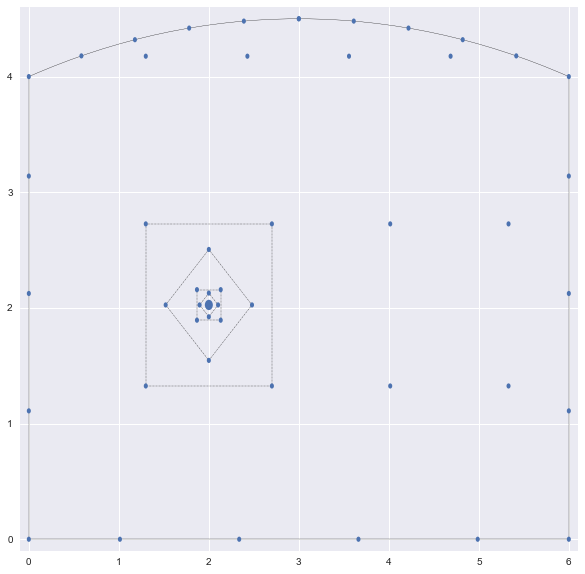

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.xlim(-0.1, Wt+0.1)
plt.ylim(-0.1, Ht+At+0.1)

# Furo vazio
xc, yc = (Bcpp + A4/2, BLp + A4/2)
ax.add_patch(patches.Circle((xc, yc), phi/2))

# Primeiro Pilão
coords1 = [(xc-B1p, yc), (xc, yc-B1p),(xc+B1p, yc), (xc, yc+B1p)]
ax.add_patch(patches.Polygon(coords1, fill=False, ls='-.'))
for coord1 in coords1:
    ax.add_patch(patches.Circle(coord1, d/2))

# Segundo Pilão
coords2 = [(xc-A2/2, yc-A2/2), (xc+A2/2, yc-A2/2), (xc+A2/2, yc+A2/2), (xc-A2/2, yc+A2/2)]
ax.add_patch(patches.Polygon(coords2, fill=False, ls='-.'))
for coord2 in coords2:
    ax.add_patch(patches.Circle(coord2, d/2))

# Terceiro Pilão
coords3 = [(xc-(B3p+A2/2), yc), (xc, yc-(B3p+A2/2)),(xc+(B3p+A2/2), yc), (xc, yc+(B3p+A2/2))]
ax.add_patch(patches.Polygon(coords3, fill=False, ls='-.'))
for coord3 in coords3:
    ax.add_patch(patches.Circle(coord3, d/2))

# Quarto Pilão
coords4 = [(xc-A4/2, yc-A4/2), (xc+A4/2, yc-A4/2), (xc+A4/2, yc+A4/2), (xc-A4/2, yc+A4/2)]
ax.add_patch(patches.Polygon(coords4, fill=False, ls='-.'))
for coord4 in coords4:
    ax.add_patch(patches.Circle(coord4, d/2))

# Seção do Túnel
theta1 = 90 - math.degrees(theta_arco) / 2
theta2 = 180 - theta1
coordst = [[0, Ht], [0, 0], [Wt, 0], [Wt, Ht]]
ax.add_patch(patches.Polygon(coordst, fill=False, closed=False))
ax.add_patch(patches.Arc((Wt/2, Ht+At-r_arco), 2*r_arco, 2*r_arco, theta1=theta1, theta2=theta2, fill=False))
ax.add_patch(patches.Circle((0, 0), d/2))
ax.add_patch(patches.Circle((Wt, 0), d/2))

# Furos de Levante
n = (nL-2)//2 if nL % 2 == 0 else (nL-1)//2
leftL = (Wt/2-BLp/2) if nL % 2 == 0 else Wt/2
rightL = (Wt/2+BLp/2) if nL % 2 == 0 else Wt/2
for i in range(n):
    ax.add_patch(patches.Circle((leftL-BLp*i, 0), d/2))
    ax.add_patch(patches.Circle((rightL+BLp*i, 0), d/2))

# Furos de Contorno do Teto
n = nct//2 if nct % 2 == 0 else (nct+1)//2
for i in range(n):
    frac = (2*i+1)*theta_arco/(2*(nct-1)) if nct % 2 == 0 else i*theta_arco/(nct-1)
    ax.add_patch(patches.Circle((Wt/2-r_arco*math.sin(frac), (Ht+At)-r_arco*(1-math.cos(frac))), d/2))
    ax.add_patch(patches.Circle((Wt/2+r_arco*math.sin(frac), (Ht+At)-r_arco*(1-math.cos(frac))), d/2))
    
# Furos de Contorno das Paredes
for i in range(ncp):
    ax.add_patch(patches.Circle((0, SL_corner+Scp*i), d/2))
    ax.add_patch(patches.Circle((Wt, SL_corner+Scp*i), d/2))

# Furos de Expansão - Linhas horizontais    
x_elh = Bcpp + A4 + Belhp
y_elh = BLp
for i in range(nhx):
    for j in range(nhy):
        ax.add_patch(patches.Circle((x_elh+Belhp*i, y_elh+Selh*j), d/2))

# Furos de Expansão - Linhas verticais
x_elv = Bcpp
y_elv = BLp + A4 + Belvp
for i in range(nvx):
    for j in range(nvy):
        ax.add_patch(patches.Circle((x_elv+Selv*i, y_elv+Belhp*j), d/2))

plt.savefig('tunel.png')
plt.show()

## Relatório resumido

In [29]:
carga_total = 0
n_total = 0

tabela = [
    {'title': '1st quad.', 'holes': 4, 'l': l1, 't': t1*1000},
    {'title': '2nd quad.', 'holes': 4, 'l': l2, 't': t2*1000},
    {'title': '3rd quad.', 'holes': 4, 'l': l3, 't': t3*1000},
    {'title': '4th quad.', 'holes': 4, 'l': l4, 't': t4*1000},
    {'title': 'Lifters', 'holes': nL, 'l': lL, 't': 38},
    {'title': 'Roof', 'holes': nct, 'l': lct, 't': tct*1000},
    {'title': 'Wall', 'holes': 2*ncp, 'l': lcp, 't': 38},
    {'title': 'Stoping', 'holes': nv+nh, 'l': le, 't': 38},
]

for linha in tabela:
    linha['charge'] = nCEx * LEx * linha['l']
    carga_total += linha['holes'] * linha['charge']
    n_total += linha['holes']

area_total = Wt*Ht + theta_arco*r_arco**2/2 - Wt*(r_arco-At)/2
carga_especifica = carga_total / (Ia * area_total)
spec_drilling = H * n_total / (Ia * area_total)

In [30]:
print('Summary')
for linha in tabela:
    print('-----------------------------------')
    print('Hole type: %s' % linha['title'])
    print('Number of holes = %d' % linha['holes'])
    print('Number of cartridges (%d mm) = %.1f' %(linha['t'], nCEx))
    print('Charge per hole = %.2f kg' % linha['charge'])
    print('Total = %.2f kg' % (linha['holes'] * linha['charge']))

print('################################')
print('Total charge weight = %.1f kg' % carga_total)
print('Cross-sectional area = %.1f m2' % area_total)
print('Advance = %.1f m' % Ia)
print('Total volume = %.1f m3' % (Ia*area_total))
print('Specific charge = %.1f kg/m3' % carga_especifica)
print('Total no. of holes = %d' % n_total)
print('Hole depth = %.1f m' % H)
print('Specific drilling = %.1f m/m3' % spec_drilling)
print('################################')

Summary
-----------------------------------
Hole type: 1st quad.
Number of holes = 4
Number of cartridges (25 mm) = 4.0
Charge per hole = 1.65 kg
Total = 6.60 kg
-----------------------------------
Hole type: 2nd quad.
Number of holes = 4
Number of cartridges (25 mm) = 4.0
Charge per hole = 1.65 kg
Total = 6.60 kg
-----------------------------------
Hole type: 3rd quad.
Number of holes = 4
Number of cartridges (38 mm) = 4.0
Charge per hole = 3.81 kg
Total = 15.24 kg
-----------------------------------
Hole type: 4th quad.
Number of holes = 4
Number of cartridges (38 mm) = 4.0
Charge per hole = 3.81 kg
Total = 15.24 kg
-----------------------------------
Hole type: Lifters
Number of holes = 6
Number of cartridges (38 mm) = 4.0
Charge per hole = 3.81 kg
Total = 22.86 kg
-----------------------------------
Hole type: Roof
Number of holes = 11
Number of cartridges (25 mm) = 4.0
Charge per hole = 1.65 kg
Total = 18.14 kg
-----------------------------------
Hole type: Wall
Number of holes = 